< 8. [Visualisation de données](04-visualisation.ipynb) | [Contents](index.ipynb) | 10. [Analyse spatiale](10-analyse-spatiale.ipynb) >

In [1]:
%pylab
%matplotlib inline
import pandas as pd
from scipy.cluster.hierarchy import dendrogram
import sklearn
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale

from pandas.plotting import scatter_matrix

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


In [2]:
data = datasets.load_iris()
# jeu de donnees cars
cars = pd.read_csv('donnees/cars.txt')
# jeu de donnees auto
autos = pd.read_csv('donnees/autos.txt', delimiter='\t')
numericAutos = autos[['wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 
       'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']]
scaledX = scale(numericAutos.to_numpy())

In [3]:
def plotClusters(K, labels, data, xname, yname):
    figure()
    for i in range(K):
        scatter(data.loc[labels==i, xname], data.loc[labels==i, yname], 
                label = 'groupe {}'.format(i))
    legend()
    xlabel(xname)
    ylabel(yname)
    
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

# Méthodes de segmentation
## Algorithme des k-moyennes

* page du module scikit-learn http://scikit-learn.org/stable/modules/clustering.html#k-means

In [4]:
K = 3
kmeans = KMeans(n_clusters=K).fit(scaledX)
for i in range(3):
    print('--------\nGroupe {}\n--------'.format(i+1))
    print(numericAutos[kmeans.labels_==i].describe())
    #print('centre du groupe {} ({} observations): {}'.format(i, sum(kmeans.labels_==i), c))

--------
Groupe 1
--------
       wheel-base      length      width     height  curb-weight  engine-size  \
count   56.000000   56.000000  56.000000  56.000000    56.000000    56.000000   
mean   105.555357  188.498214  68.517857  55.101786  3228.571429   172.375000   
std      6.635632    8.326071   1.870450   2.444697   333.832721    48.270662   
min     89.500000  168.900000  65.000000  47.800000  2756.000000   120.000000   
25%    102.850000  186.600000  67.200000  54.100000  3019.000000   140.750000   
50%    105.800000  188.800000  68.400000  55.700000  3135.000000   162.500000   
75%    109.100000  192.700000  69.775000  56.700000  3392.500000   185.750000   
max    120.900000  208.100000  72.300000  58.700000  4066.000000   326.000000   

            bore     stroke  compression-ratio  horsepower     peak-rpm  \
count  56.000000  56.000000          56.000000   56.000000    56.000000   
mean    3.558393   3.255714          11.007143  145.910714  5056.250000   
std     0.199543  

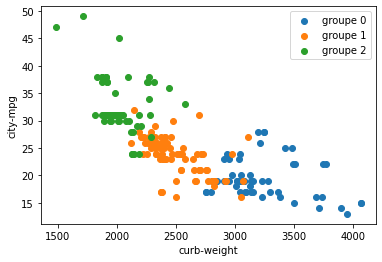

In [5]:
plotClusters(K, kmeans.labels_, autos, 'curb-weight', 'city-mpg')

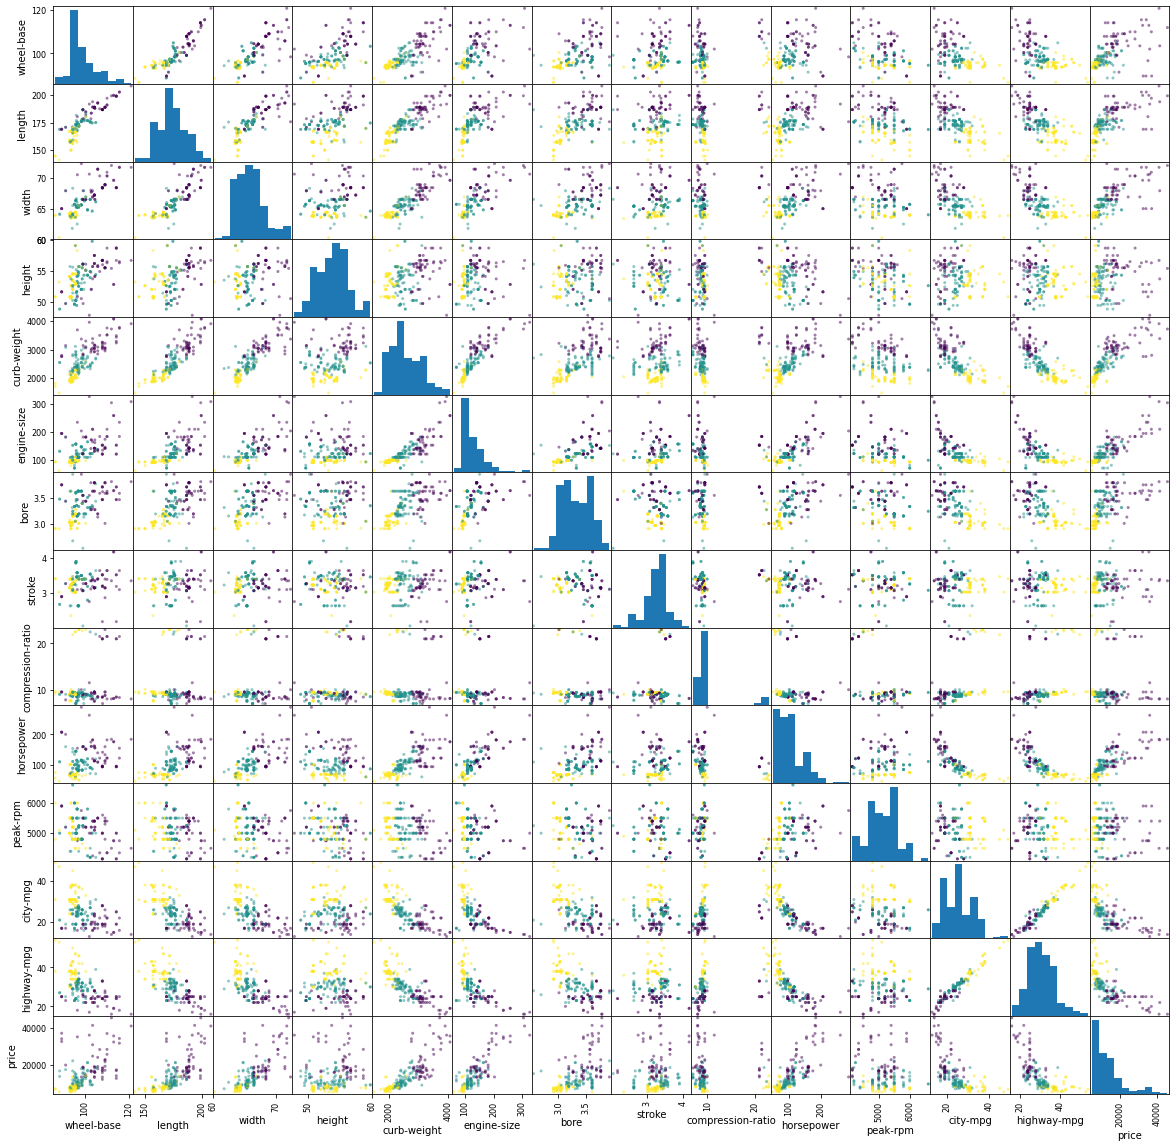

In [6]:
_=scatter_matrix(numericAutos, figsize=(20,20), c = kmeans.labels_)

## Méthodes de classification hiérarchique ascendante
* page du module scikit-learn http://scikit-learn.org/stable/modules/clustering.html#hierarchical-clustering

In [7]:
from sklearn.cluster import AgglomerativeClustering
K = 3
hac = AgglomerativeClustering(n_clusters=K, linkage = "complete").fit(scaledX)
for i in range(3):
    print('--------\nGroupe {}\n--------'.format(i+1))
    print(numericAutos[hac.labels_==i].describe())

--------
Groupe 1
--------
       wheel-base      length      width     height  curb-weight  engine-size  \
count   28.000000   28.000000  28.000000  28.000000    28.000000    28.000000   
mean   104.885714  187.525000  69.078571  54.017857  3407.321429   202.321429   
std      9.251655   12.121228   2.066910   3.205904   385.129228    49.736382   
min     89.500000  168.900000  65.000000  47.800000  2756.000000   145.000000   
25%     97.950000  177.800000  67.900000  51.400000  3182.500000   173.750000   
50%    107.900000  188.900000  68.650000  55.150000  3405.000000   188.500000   
75%    112.250000  198.900000  70.525000  56.550000  3721.250000   215.250000   
max    120.900000  208.100000  72.300000  58.700000  4066.000000   326.000000   

            bore     stroke  compression-ratio  horsepower     peak-rpm  \
count  28.000000  28.000000          28.000000   28.000000    28.000000   
mean    3.621429   3.373571          13.289286  160.107143  4882.142857   
std     0.181490  

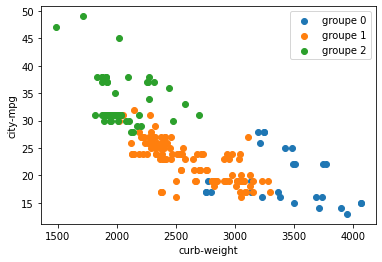

In [8]:
plotClusters(K, hac.labels_, autos, 'curb-weight', 'city-mpg')

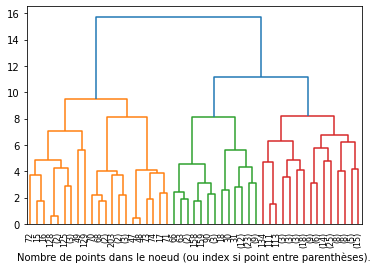

In [9]:
hac = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage = "complete").fit(scaledX)
plot_dendrogram(hac, truncate_mode='level', p=5)
_=plt.xlabel("Nombre de points dans le noeud (ou index si point entre parenthèses).")